In [3]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import figure
mp.rcParams['figure.figsize']=(12,8)

In [4]:
#merging the months file into one file
import glob
path=r'C:\Users\admin\Downloads\Py_DS_ML_Bootcamp-master\Sales Data'
files = glob.glob(path + '\*.csv')
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
df.to_csv('all_months',index=False)
df=pd.read_csv('all_months')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


# Cleaning Data

In [5]:
for col in df.columns:
    miss_percent=np.mean(df[col].isnull())
    print('{}  {}%'.format(col,miss_percent))

Order ID  0.002916778164302917%
Product  0.002916778164302917%
Quantity Ordered  0.002916778164302917%
Price Each  0.002916778164302917%
Order Date  0.002916778164302917%
Purchase Address  0.002916778164302917%


In [6]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
df.dropna(how="all",inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# Argument the data with some additional columns

In [85]:
#adding new month column

In [8]:
import calendar
df['month']=df['Order Date'].str[0:2]
df=df[df['month']!='Or']
df['month']=df['month'].astype('int32')
df['month']

0         4
1         4
2         4
3         4
4         4
         ..
186300    9
186301    9
186302    9
186303    9
186304    9
Name: month, Length: 185950, dtype: int32

# the best month of sale

In [9]:
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [10]:
#adding a sales column
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'])
df['Price Each']=pd.to_numeric(df['Price Each'])

In [11]:
df['sales']=df['Quantity Ordered']*df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


# What was the best month for sale?

In [17]:
results=df.groupby('month').sum()
results.sort_values(by='sales',ascending=False)

,Quantity Ordered,Price Each,sales
month,,,
12,28114,4588415.41,4613443.34
10,22703,3715554.83,3736726.88
4,20558,3367671.02,3390670.24
11,19798,3180600.68,3199603.20
5,18667,3135125.13,3152606.75
3,17005,2791207.83,2807100.38
7,16072,2632539.56,2647775.76
6,15253,2562025.61,2577802.26
8,13448,2230345.42,2244467.88


Text(0, 0.5, 'Sales')

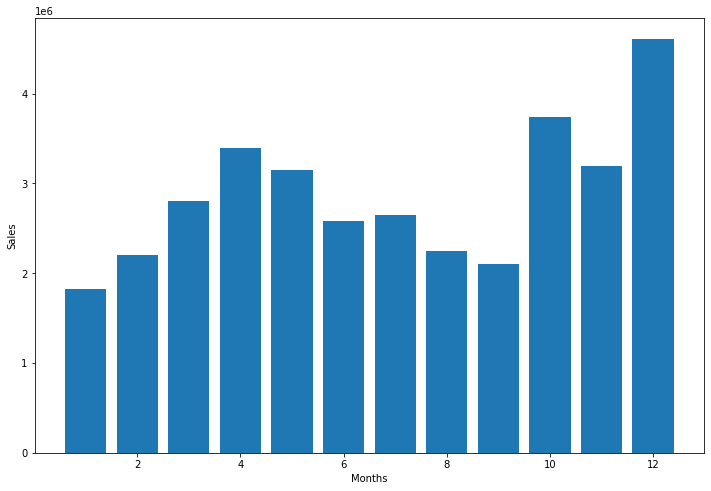

In [116]:
months=range(1,13)
plt.bar(months,results['sales'])
plt.xlabel('Months')
plt.ylabel('Sales')

# what city had the highest sale?

In [16]:
#adding the city column to data
df['city']=df['Purchase Address'].str.split(',').str[1]
df_sale_city=df.groupby('city').sum()
df_sale_city.sort_values(by='sales',ascending=False)



,Quantity Ordered,Price Each,month,sales
city,,,,
San Francisco,50239,8211461.74,315520,8262203.91
Los Angeles,33289,5421435.23,208325,5452570.80
New York City,27932,4635370.83,175741,4664317.43
Boston,22528,3637409.77,141112,3661642.01
Atlanta,16602,2779908.20,104794,2795498.58
Dallas,16730,2752627.82,104620,2767975.40
Seattle,16553,2733296.01,104941,2747755.48
Portland,14053,2307747.47,87765,2320490.61
Austin,11153,1809873.61,69829,1819581.75


<BarContainer object of 9 artists>

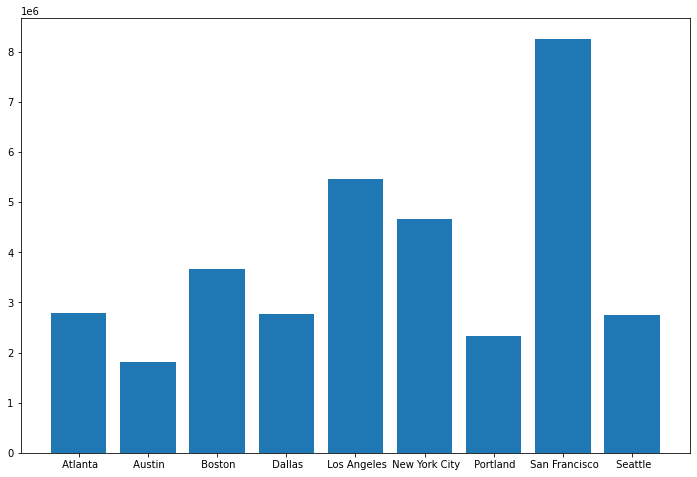

In [139]:
cities=[city for city ,df in df.groupby('city')]
plt.bar(cities,df_sale_city['sales'])

# what time is the best time of the day to advertise the product?


Text(0, 0.5, 'Sale amounts')

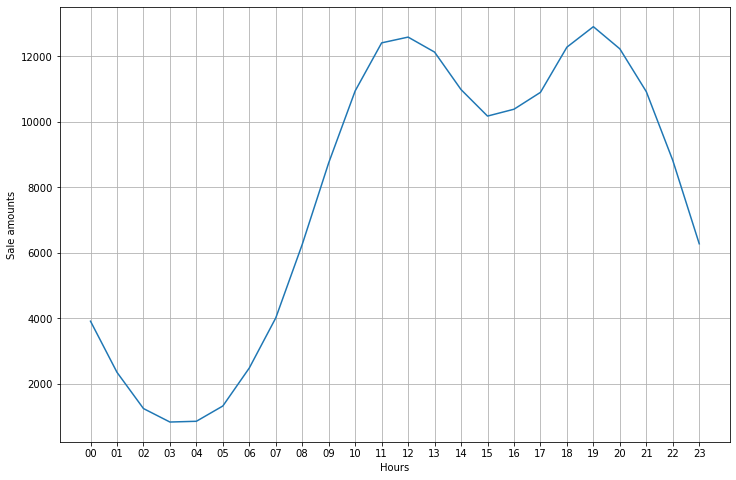

In [56]:
df['hour']=df['Order Date'].str.split(' ').str[1].str[0:2]
df['hour']
best_hour=df.groupby(['hour']).count()
best_hour
hours=[hour for hour,df in df.groupby('hour')]
sns.lineplot(x=hours,y=best_hour['sales'])
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Sale amounts')
#best_hour.sort_values(by="sales",ascending=False)

# what products are often sold together?


In [61]:
# they should have the same order Id

In [80]:
df_order=df[df['Order ID'].duplicated(keep=False)]
df_order['grouped']=df_order.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df_order.duplicated()

C:\Users\admin\AppData\Local\Temp\ipykernel_10648\1331300984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order['grouped']=df_order.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour,grouped
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...
186248,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186259,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,00,"Wired Headphones,AAA Batteries (4-pack)"
186260,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,00,"Wired Headphones,AAA Batteries (4-pack)"
186296,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,13,"Google Phone,USB-C Charging Cable"


In [89]:
u=df_order.groupby("grouped").count().sort_values(by='Product',ascending=False)
u.head(15)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour
grouped,,,,,,,,,,
"iPhone,Lightning Charging Cable",1764,1764,1764,1764,1764,1764,1764,1764,1764,1764
"Google Phone,USB-C Charging Cable",1712,1712,1712,1712,1712,1712,1712,1712,1712,1712
"iPhone,Wired Headphones",722,722,722,722,722,722,722,722,722,722
"Vareebadd Phone,USB-C Charging Cable",624,624,624,624,624,624,624,624,624,624
"Google Phone,Wired Headphones",606,606,606,606,606,606,606,606,606,606
"iPhone,Apple Airpods Headphones",572,572,572,572,572,572,572,572,572,572
"Google Phone,Bose SoundSport Headphones",322,322,322,322,322,322,322,322,322,322
"Google Phone,USB-C Charging Cable,Wired Headphones",231,231,231,231,231,231,231,231,231,231
"Vareebadd Phone,Wired Headphones",208,208,208,208,208,208,208,208,208,208


# what product sold the most?

In [117]:
products=[pro for pro,df in df.groupby('Product')]
products

['20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone']

Text(0, 0.5, 'Amounts')

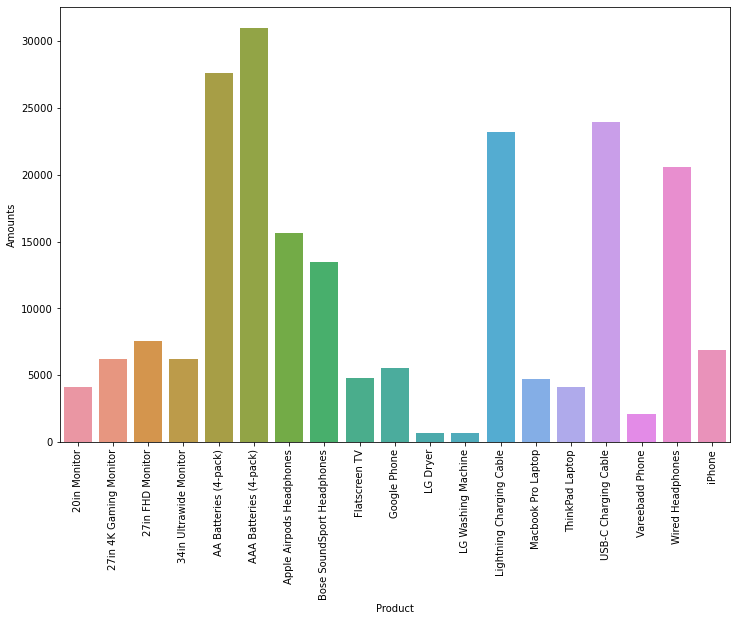

In [135]:
g=sns.barplot(x=products,y=df.groupby('Product')['Quantity Ordered'].sum()).set_xticklabels(labels=products,rotation=90)
plt.xlabel('Product')
plt.ylabel('Amounts')

In [143]:
# Considering the sold amounts and the price of the products together
df_prices=df.groupby('Product')['Price Each'].mean()


Product
20in Monitor              109.99
27in 4K Gaming Monitor    389.99
27in FHD Monitor          149.99
34in Ultrawide Monitor    379.99
AA Batteries (4-pack)       3.84
Name: Price Each, dtype: float64

C:\Users\admin\AppData\Local\Temp\ipykernel_10648\1401556100.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe1.set_xticklabels(labels=products,rotation=90)


Text(0, 0.5, 'Price')

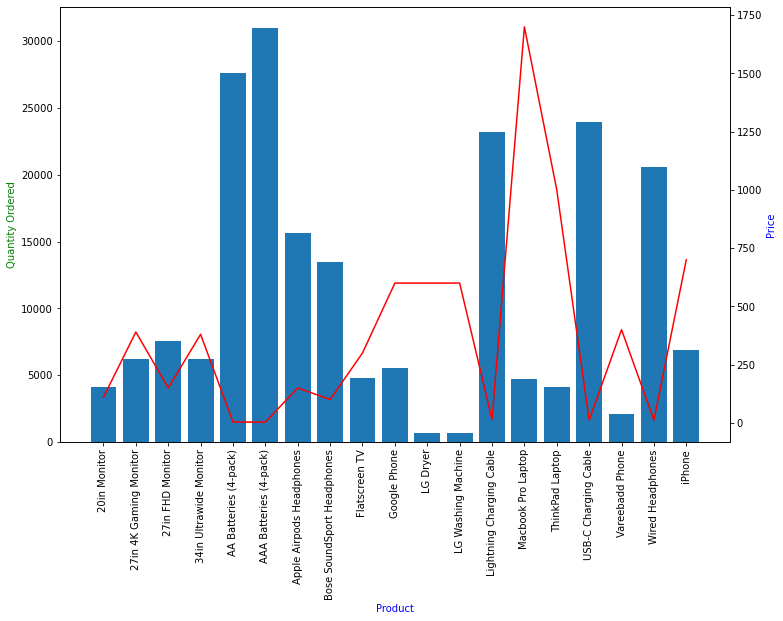

In [165]:
df_quantity=df.groupby('Product')['Quantity Ordered'].sum()
fig,axe1=plt.subplots()
axe2=axe1.twinx()

axe1.bar(products,df_quantity)
axe2.plot(products,df_prices,'-r')
axe1.set_xticklabels(labels=products,rotation=90)
axe1.set_xlabel('Product',color='b')
axe1.set_ylabel('Quantity Ordered' ,color='g')
axe2.set_ylabel('Price',color='b')
